
# K-Means Clustering

**Dataset:** P₁(0,0), P₂(0,1), P₃(1,0), P₄(5,0), P₅(6,0), P₆(6,1)  
**Goal:** Teach how K-Means works *step-by-step* on a tiny dataset, then verify with `scikit-learn` and discuss **inertia** and **silhouette score**.

---

## Learning Objectives

1. Explain the K-Means workflow (initialize → assign → update → repeat).
2. Compute distances and cluster assignments by hand for a small dataset.
3. Calculate new centroids and check for **convergence**.
4. Visualize clusters in 2D.
5. Evaluate clustering with **inertia** and **silhouette score**.


##  Imports and Environment Check

- We use **NumPy**, **Pandas**, **Matplotlib**, and **scikit-learn**.
- On Google Colab, these are usually preinstalled.  
- If a package is missing, the cell below will install it.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



##  Tiny Dataset

We will define the six 2D points and their labels.


In [20]:

# Define the six points and labels
labels = np.array(["P1","P2","P3","P4","P5","P6"])
X = np.array([
    [0,0],  # P1
    [0,1],  # P2
    [1,0],  # P3
    [5,0],  # P4
    [6,0],  # P5
    [6,1],  # P6
], dtype=float)

df_points = pd.DataFrame(X, columns=["x","y"], index=labels)
df_points


,x,y
P1,0.0,0.0
P2,0.0,1.0
P3,1.0,0.0
P4,5.0,0.0
P5,6.0,0.0
P6,6.0,1.0



## 2) Visualize the Points




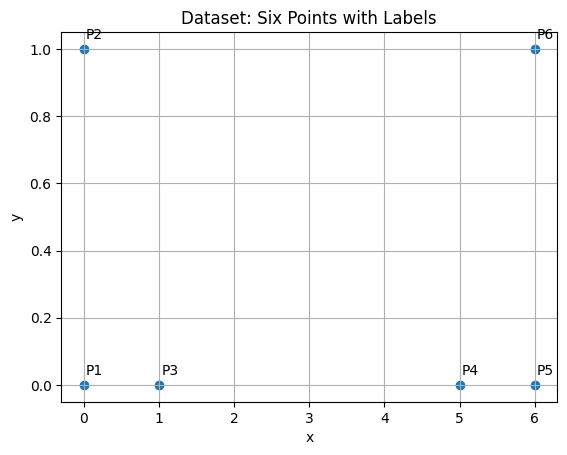

In [21]:

# Simple scatter plot (single plot, default colors)
plt.figure()
plt.scatter(X[:,0], X[:,1])
for i, txt in enumerate(labels):
    plt.annotate(txt, (X[i,0]+0.03, X[i,1]+0.03))
plt.title("Dataset: Six Points with Labels")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()



## 3) Manual K-Means — Initialization

We'll start with **K = 2** clusters and choose **initial centroids** at points **P2** and **P6**

- **C₁ initial center**: P2 = (0, 1)  
- **C₂ initial center**: P6 = (6, 1)

> In practice, K-Means usually picks random starting points or uses k-means++.


In [22]:

m1 = X[labels.tolist().index("P2")]  # (0,1)
m2 = X[labels.tolist().index("P6")]  # (6,1)

m1, m2


(array([0., 1.]), array([6., 1.]))


## 4) Iteration 1 — Assign Each Point to the Nearest Centroid

We compute Euclidean distances from each point to `m1` and `m2`, then assign to the nearest.


In [23]:
def euclidean(a, b):
    return float(np.sqrt(np.sum((a-b)**2)))

d_to_m1 = np.array([euclidean(pt, m1) for pt in X])
d_to_m2 = np.array([euclidean(pt, m2) for pt in X])
assign_1 = np.where(d_to_m1 <= d_to_m2, 1, 2)  # 1 -> cluster around m1, 2 -> cluster around m2

tbl1 = pd.DataFrame({
    "Point": labels,
    "x": X[:,0],
    "y": X[:,1],
    "dist_to_P2(m1)": d_to_m1,
    "dist_to_P6(m2)": d_to_m2,
    "Assigned_Cluster": assign_1
})
tbl1.set_index("Point")


,x,y,dist_to_P2(m1),dist_to_P6(m2),Assigned_Cluster
Point,,,,,
P1,0.0,0.0,1.000000,6.082763,1
P2,0.0,1.0,0.000000,6.000000,1
P3,1.0,0.0,1.414214,5.099020,1
P4,5.0,0.0,5.099020,1.414214,2
P5,6.0,0.0,6.082763,1.000000,2
P6,6.0,1.0,6.000000,0.000000,2



**Interpretation of Iteration 1:**  
- Cluster **C₁ (m1=P2)** gets: P1, P2, P3  
- Cluster **C₂ (m2=P6)** gets: P4, P5, P6



## 5) Update Step — Compute New Centroids

We take the mean of points in each cluster to get new centers:

$$
m_1 = \big(\tfrac{0+0+1}{3},\; \tfrac{0+1+0}{3}\big) = (0.33, 0.33),\quad
m_2 = \big(\tfrac{5+6+6}{3},\; \tfrac{0+0+1}{3}\big) = (5.67, 0.33)\approx(5.6, 0.33)
$$


In [24]:

# Recompute centroids from Iteration 1 assignments
C1_pts = X[assign_1 == 1]
C2_pts = X[assign_1 == 2]

m1_new = C1_pts.mean(axis=0)
m2_new = C2_pts.mean(axis=0)

m1_new, m2_new


(array([0.33333333, 0.33333333]), array([5.66666667, 0.33333333]))


## 6) Iteration 2 — Reassign Using New Centroids

Now we repeat: compute distances to the **updated** centers and reassign.


In [25]:

d_to_m1_2 = np.array([euclidean(pt, m1_new) for pt in X])
d_to_m2_2 = np.array([euclidean(pt, m2_new) for pt in X])
assign_2 = np.where(d_to_m1_2 <= d_to_m2_2, 1, 2)

tbl2 = pd.DataFrame({
    "Point": labels,
    "x": X[:,0],
    "y": X[:,1],
    "dist_to_m1(0.33,0.33)": d_to_m1_2.round(4),
    "dist_to_m2(5.67,0.33)": d_to_m2_2.round(4),
    "Assigned_Cluster": assign_2
}).set_index("Point")

tbl2


,x,y,"dist_to_m1(0.33,0.33)","dist_to_m2(5.67,0.33)",Assigned_Cluster
Point,,,,,
P1,0.0,0.0,0.4714,5.6765,1
P2,0.0,1.0,0.7454,5.7057,1
P3,1.0,0.0,0.7454,4.6786,1
P4,5.0,0.0,4.6786,0.7454,2
P5,6.0,0.0,5.6765,0.4714,2
P6,6.0,1.0,5.7057,0.7454,2



## 7) Check for Convergence

K-Means **converges** when assignments stop changing or centroids stop moving significantly.
In our case, assignments are stable after Iteration 2 — so we can stop.


In [26]:

converged = np.array_equal(assign_1, assign_2)
movement = np.linalg.norm(m1_new - m1) + np.linalg.norm(m2_new - m2)

print("Assignments stable after Iteration 2? ->", converged)
print("Total centroid movement from initial to new:", movement)

final_assign = assign_2
final_m1, final_m2 = m1_new, m2_new

final_assign, final_m1, final_m2


Assignments stable after Iteration 2? -> True
Total centroid movement from initial to new: 1.4907119849998596


(array([1, 1, 1, 2, 2, 2]),
 array([0.33333333, 0.33333333]),
 array([5.66666667, 0.33333333]))


## 8) Visualize Final Clusters and Centroids


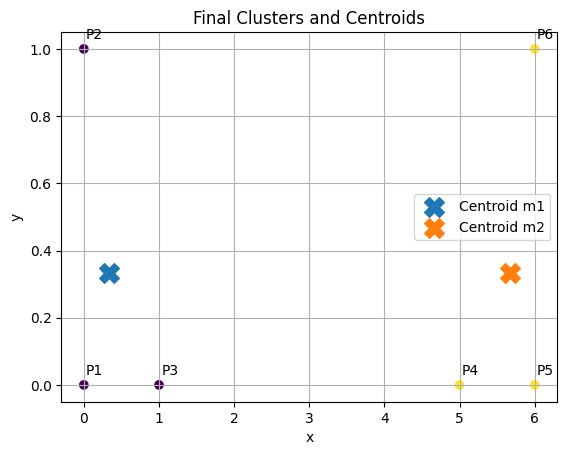

In [27]:

plt.figure()
# plot points; default colors by cluster label (simple trick)
colors = np.where(final_assign==1, 0, 1)  # 0 or 1 for color cycle
plt.scatter(X[:,0], X[:,1], c=colors)
for i, txt in enumerate(labels):
    plt.annotate(txt, (X[i,0]+0.03, X[i,1]+0.03))

# plot centroids as larger markers
plt.scatter([final_m1[0]], [final_m1[1]], marker='X', s=200, label='Centroid m1')
plt.scatter([final_m2[0]], [final_m2[1]], marker='X', s=200, label='Centroid m2')
plt.title("Final Clusters and Centroids")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()



## 9) Evaluate with `scikit-learn`: Inertia and Silhouette Score

- **Inertia**: Sum of squared distances of samples to their closest centroid (lower is tighter clusters).  
- **Silhouette Score**: How well-separated clusters are. Ranges **-1 to +1** (higher is better).


In [28]:

# Fit scikit-learn KMeans with k=2 (random_state for reproducibility)
km = KMeans(n_clusters=2, n_init=10, random_state=42)
km.fit(X)

sk_centers = km.cluster_centers_
sk_labels = km.labels_
sk_inertia = km.inertia_

# silhouette_score requires at least 2 clusters and more than 1 sample per cluster (true here)
sil_score = silhouette_score(X, sk_labels)

print("scikit-learn KMeans centers:\n", sk_centers)
print("Inertia:", sk_inertia)
print("Silhouette Score:", sil_score)


scikit-learn KMeans centers:
 [[0.33333333 0.33333333]
 [5.66666667 0.33333333]]
Inertia: 2.666666666666667
Silhouette Score: 0.7855900552946776



## 10) Elbow Method

We compute inertia for K = 1 to 4 to illustrate the **elbow** idea (pick K where adding more clusters gives diminishing returns).


In [29]:

Ks = [1,2,3,4]
inertias = []
for k in Ks:
    kmk = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
    inertias.append(kmk.inertia_)

pd.DataFrame({"K": Ks, "Inertia": inertias})


,K,Inertia
0,1,45.333333
1,2,2.666667
2,3,1.833333
3,4,1.000000


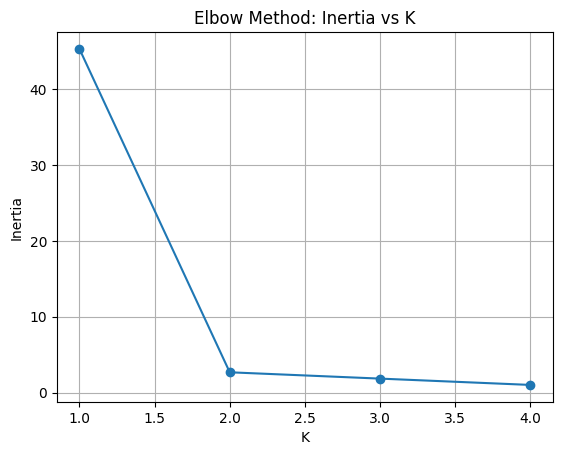

In [30]:

plt.figure()
plt.plot(Ks, inertias, marker='o')
plt.title("Elbow Method: Inertia vs K")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


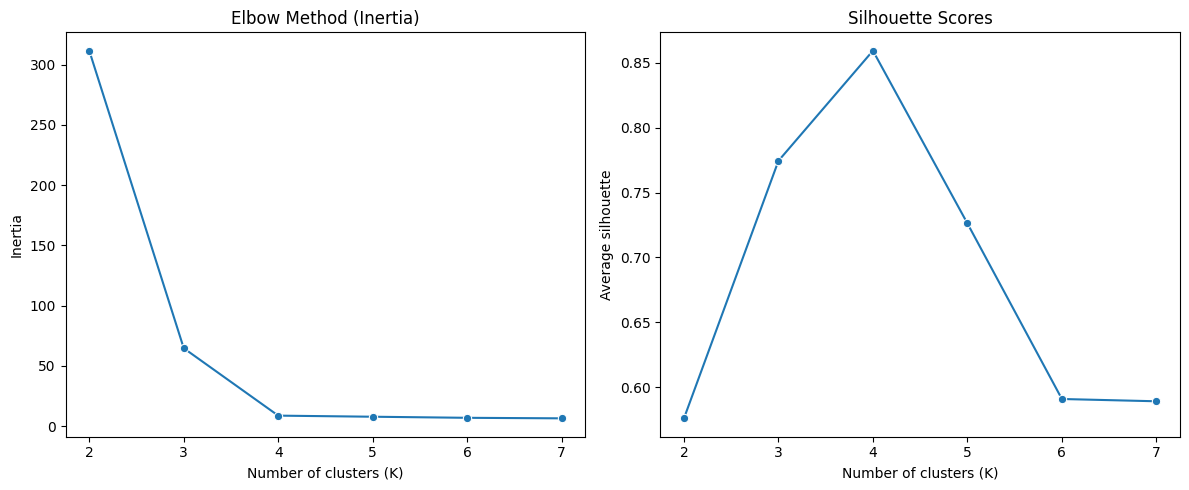

In [31]:

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# Generate synthetic 2D data (easy to visualize)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different K values
inertias, silhouettes, Ks = [], [], range(2, 8)

for k in Ks:
    km = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

# Plot Elbow (Inertia) and Silhouette curves
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(x=Ks, y=inertias, marker="o", ax=axes[0])
axes[0].set_title("Elbow Method (Inertia)")
axes[0].set_xlabel("Number of clusters (K)")
axes[0].set_ylabel("Inertia")

sns.lineplot(x=Ks, y=silhouettes, marker="o", ax=axes[1])
axes[1].set_title("Silhouette Scores")
axes[1].set_xlabel("Number of clusters (K)")
axes[1].set_ylabel("Average silhouette")

plt.tight_layout()
plt.show()


**One more example on synthetic dataset:**

Scaling is important for k-means




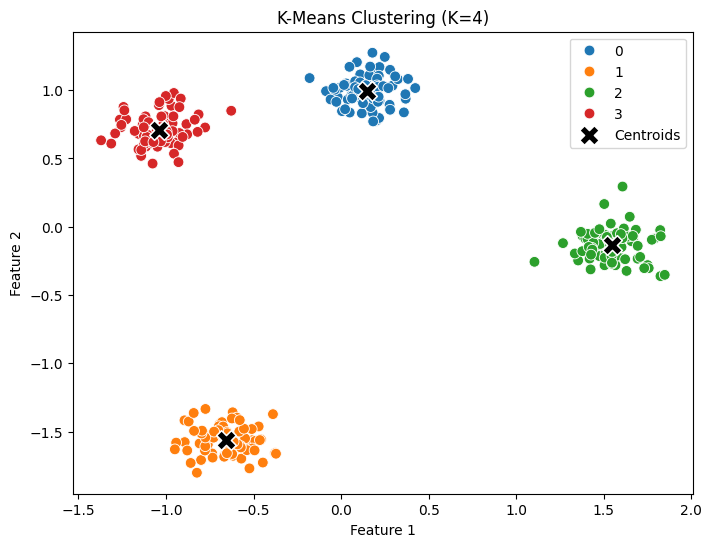

In [32]:
# Choose the best K (say 4, by observing elbow/silhouette)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init='auto', random_state=42)
labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

# Visualize clustered data
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='tab10', s=60)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1],
                color='black', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering (K=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



## Key Takeaways

- K-Means alternates between **assignment** and **update** steps until **convergence**.  
- On our 6 points, with initial centers at **P2** and **P6**, the algorithm converges in **2 iterations**.  
- **Inertia** (lower is better) and **Silhouette Score** (closer to **+1** is better) help evaluate quality.  
- For real datasets, try multiple initializations or use **k-means++**, and compare K values with the **elbow method**.
